In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


In [3]:
results_file = 'write/late-secretory-garcia-alonso-results.h5ad'

In [11]:
adata = sc.read_h5ad(
    'cache/endometrium_all.h5ad')

In [12]:
adata

AnnData object with n_obs × n_vars = 100307 × 28614
    obs: 'SampleID', 'log2p1_count', 'percent_mito', 'n_genes', 'DonorID', 'BiopsyType', 'Location', 'Binary Stage', 'Stage', 'Broad cell type', 'Cell type', 'CellCycle Phase'
    var: 'gene_ids', 'n_cells'
    uns: 'Binary Stage_colors', 'BinaryStage_colors', 'BiopsyType_colors', 'Broad cell type_colors', 'Cell type_colors', 'CellCycle Phase_colors', 'Day_colors', 'DonorID_colors', 'Location_colors', 'SampleID_colors', 'cosine_logXformedproj_bulkorg_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_res2_colors', 'cosine_logXformedproj_bulkorg_hormones_colors', 'cosine_logXformedproj_bulkorg_noinhib_colors', 'cosine_logXformedproj_bulkorg_strhormnoinhib_colors', 'cosine_proj_bulkorg_colors', 'cosine_proj_bulkorg_hormnoinhib_colors', 'cosine_proj_bulkorg_hormnoinhib_res2_colors', 'cosine_proj_bulkorg_hormones_colors', 'cosine_proj_bulkorg_noinhib_colors', 'cosine_proj_bulkorg_strhor

In [13]:
adata.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,13.951467,0.057320,3842,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,S
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,13.776227,0.043838,3544,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,12.894628,0.070791,2507,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Supporting,PV STEAP4,G1
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,12.329235,0.071137,1928,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,dS,G1
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,12.171176,0.063977,1824,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4577315_TTTGGTTAGGATAATC,GSM4577315,15.003430,0.041133,6244,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M
GSM4577315_TTTGGTTCACTACACA,GSM4577315,14.409987,0.025634,5045,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1
GSM4577315_TTTGGTTGTCCGACGT,GSM4577315,13.338180,0.079575,2911,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1
GSM4577315_TTTGTTGGTTCGGCCA,GSM4577315,13.996120,0.059918,4592,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M


In [14]:
adata.lss = adata[adata.obs["SampleID"] == "MRC_Endo8625698",:] #lss=late secretory tissue sample

In [21]:
adata.lss.var_names_make_unique()

In [15]:
adata.lss

View of AnnData object with n_obs × n_vars = 4310 × 28614
    obs: 'SampleID', 'log2p1_count', 'percent_mito', 'n_genes', 'DonorID', 'BiopsyType', 'Location', 'Binary Stage', 'Stage', 'Broad cell type', 'Cell type', 'CellCycle Phase'
    var: 'gene_ids', 'n_cells'
    uns: 'Binary Stage_colors', 'BinaryStage_colors', 'BiopsyType_colors', 'Broad cell type_colors', 'Cell type_colors', 'CellCycle Phase_colors', 'Day_colors', 'DonorID_colors', 'Location_colors', 'SampleID_colors', 'cosine_logXformedproj_bulkorg_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_res2_colors', 'cosine_logXformedproj_bulkorg_hormones_colors', 'cosine_logXformedproj_bulkorg_noinhib_colors', 'cosine_logXformedproj_bulkorg_strhormnoinhib_colors', 'cosine_proj_bulkorg_colors', 'cosine_proj_bulkorg_hormnoinhib_colors', 'cosine_proj_bulkorg_hormnoinhib_res2_colors', 'cosine_proj_bulkorg_hormones_colors', 'cosine_proj_bulkorg_noinhib_colors', 'cosine_proj_bulkorg_

## Preprocessing

/Users/franziskakoch/PycharmProjects/Organoids_sc_WS2122/venv/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


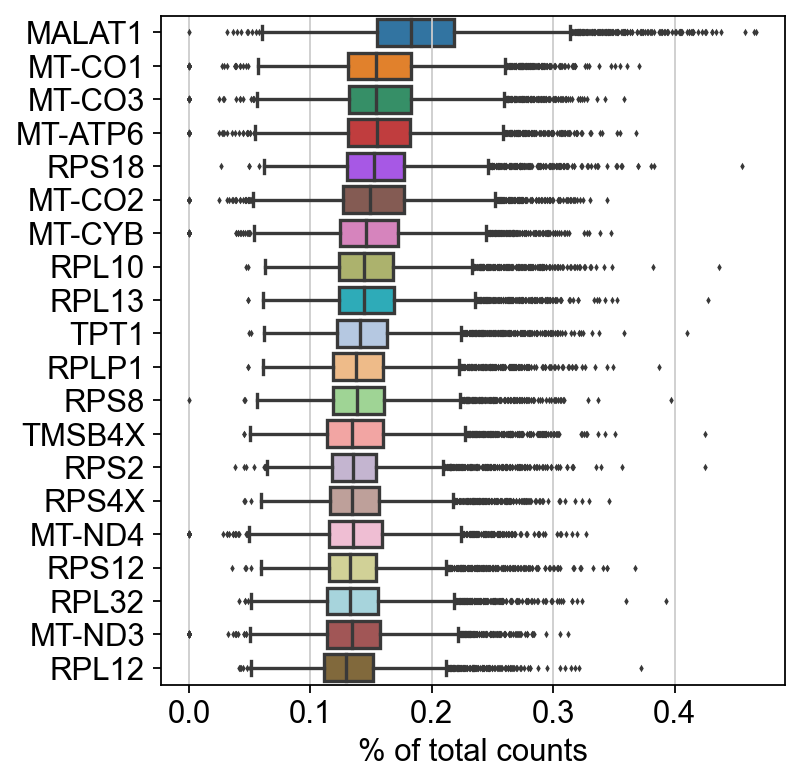

In [16]:
sc.pl.highest_expr_genes(adata.lss, n_top=20, )

In [18]:
sc.pp.filter_cells(adata.lss, min_genes=200)
sc.pp.filter_genes(adata.lss, min_cells=3)

filtered out 8736 genes that are detected in less than 3 cells


In [20]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata.lss, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

KeyError: 'mt'